# Python Plotting with Matplotlib
## Basic Plots

In [53]:
import numpy as np
import matplotlib.pyplot as plt

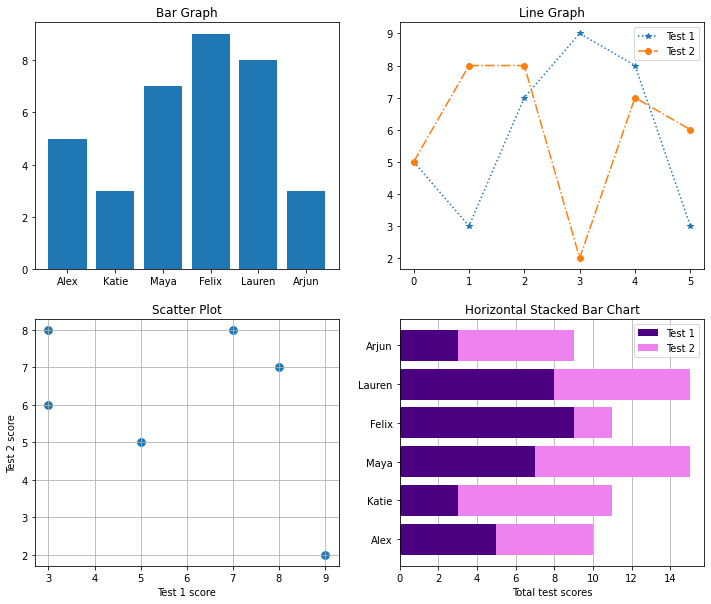

In [54]:
test_1 = np.array([5, 3, 7, 9, 8, 3])
test_2 = np.array([5, 8, 8, 2, 7, 6])
x = np.arange(len(test_1))
students = ["Alex", "Katie", "Maya", "Felix", "Lauren", "Arjun"]

fig, axs = plt.subplots(2, 2, figsize=(12,10))

# Bar chart
axs[0,0].bar(students, test_1)
axs[0,0].set_title('Bar Graph')

# Line graph
axs[0,1].plot(x, test_1, label="Test 1", marker='*', linestyle=":")
axs[0,1].plot(x, test_2, label="Test 2", marker='o', linestyle="-.")
axs[0,1].set_title('Line Graph')
axs[0,1].legend()

# Scatter plot
axs[1,0].grid()
axs[1,0].scatter(test_1, test_2, s=60)
axs[1,0].set_title('Scatter Plot')
axs[1,0].set_xlabel('Test 1 score')
axs[1,0].set_ylabel('Test 2 score')

# Stacked bar chart
axs[1,1].barh(students, test_1, label="Test 1", color='indigo')
axs[1,1].barh(students, test_2, label="Test 2", left=test_1, color="violet")
axs[1,1].legend()
axs[1,1].grid(axis='x')
axs[1,1].set_axisbelow(True)
axs[1,1].set_title('Horizontal Stacked Bar Chart')
axs[1,1].set_xlabel('Total test scores');

## 2D Exercises
1. Vertical stacked bar chart


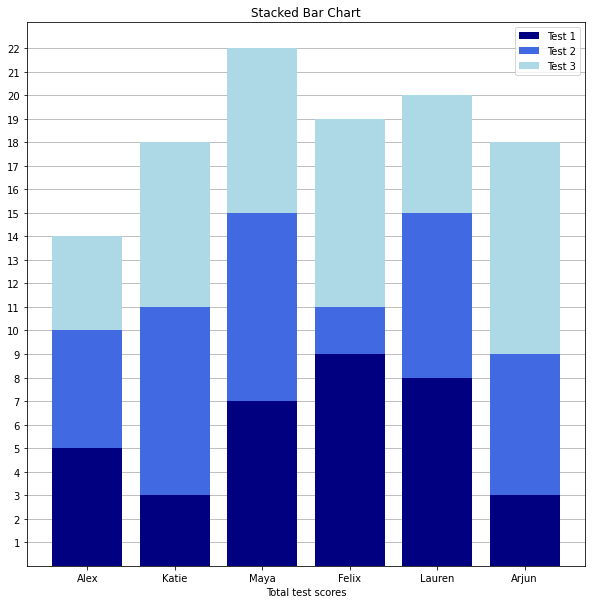

In [55]:
fix, ax = plt.subplots(figsize=(10, 10))
# Stacked bar chart
test_3 = np.array([4, 7, 7, 8, 5, 9])
ax.bar(students, test_1, label="Test 1", color='navy')
ax.bar(students, test_2, label="Test 2", bottom=test_1, color="royalblue")
ax.bar(students, test_3, label="Test 3", bottom=test_1 + test_2, color="lightblue")
ax.legend()
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_title('Stacked Bar Chart')
ax.set_xlabel('Total test scores')
ax.set_yticks(np.arange(0, max(test_1 + test_2 + test_3)) + 1);

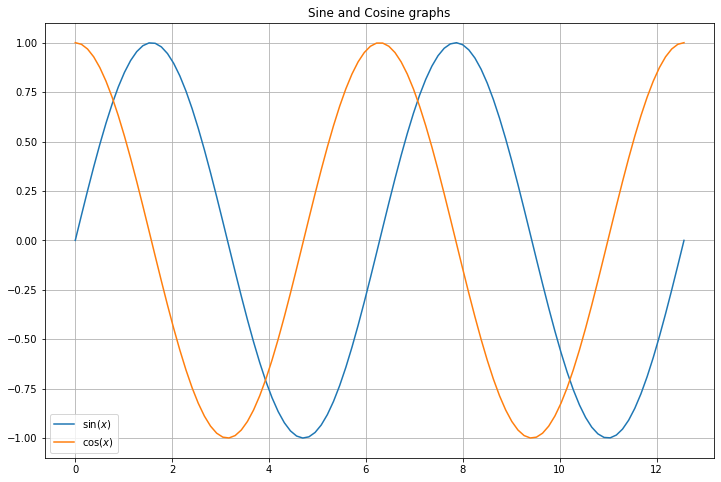

In [56]:
n_points = 100
x = np.linspace(0, 4 * np.pi, n_points)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, np.sin(x), label="$\sin(x)$")
ax.plot(x, np.cos(x), label="$\cos(x)$")
ax.set_title("Sine and Cosine graphs")
ax.grid()
ax.legend();

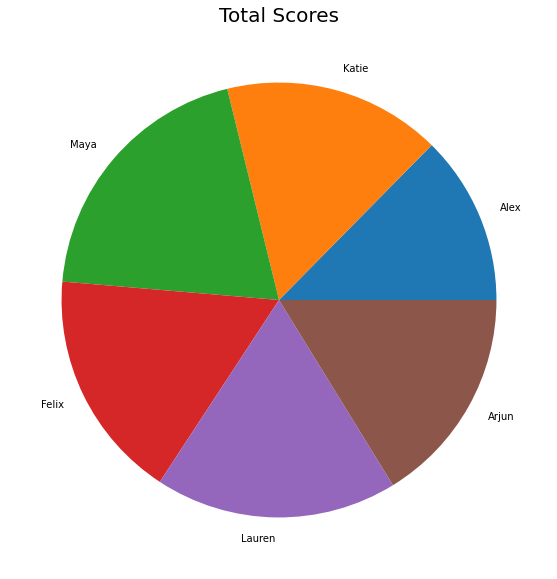

In [57]:
fix, ax = plt.subplots(figsize=(10,10))
totals = test_1 + test_2 + test_3
ax.pie(totals, labels=students)
ax.set_title('Total Scores')
ax.title.set_fontsize(20);

# Plotting 3D data
## Heat map

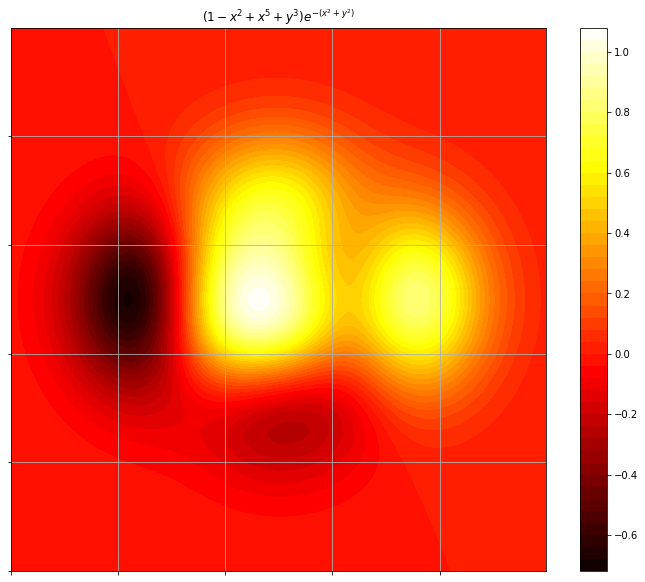

In [71]:
n_points = 1000
x = np.linspace(-3, 3, n_points)
xx, yy = np.meshgrid(x, x)
z = np.exp(-(xx**2 + yy**2)) * (1 - xx/2 + xx**5 + yy**3)
fig, ax = plt.subplots(figsize=(12, 10))
c = ax.contourf(z, levels=50, cmap='hot')
ax.grid()
ax.set(xticklabels=[],
       yticklabels=[])
ax.set_title('$(1-x^2+x^5+y^3)e^{-(x^2+y^2)}$')
fig.colorbar(c, ax=ax);

## Contour plots

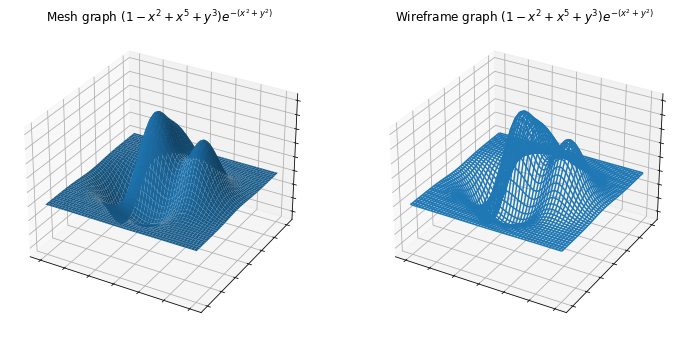

In [74]:
fig, ax = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize=(12,10))
ax[0].plot_surface(xx, yy, z, vmin=z.min() * 2)
ax[0].set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])
ax[0].set_title('Mesh graph $(1-x^2+x^5+y^3)e^{-(x^2+y^2)}$')

wf= ax[1].plot_wireframe(xx, yy, z)
ax[1].set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])
ax[1].set_title('Wireframe graph $(1-x^2+x^5+y^3)e^{-(x^2+y^2)}$');

# Annotated Figure Example

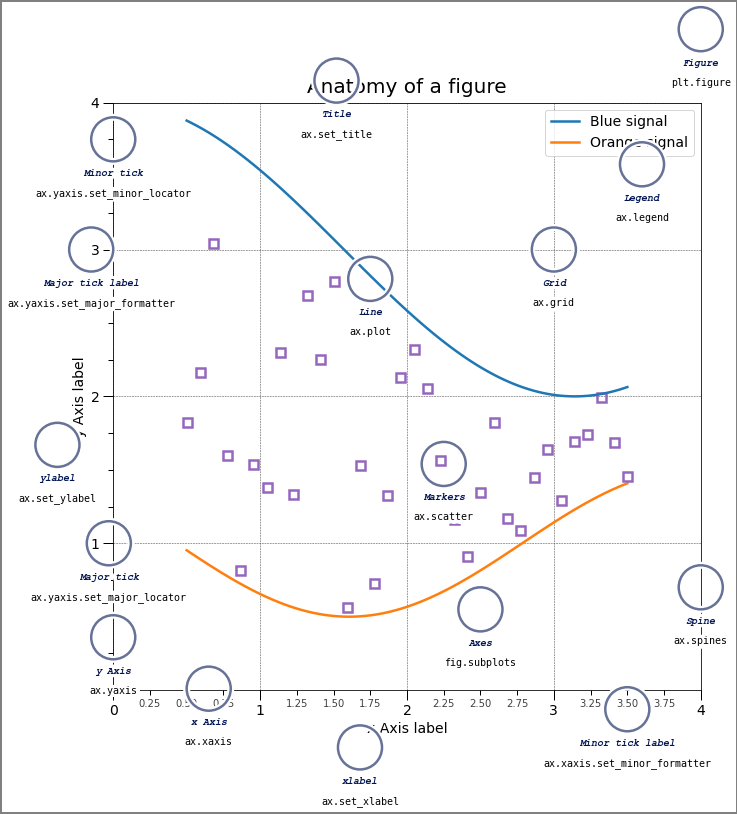

In [60]:
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='Courier New',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()